In [1]:
%pip install Faker


     ---------------------------------------- 1.5/1.5 MB 8.8 MB/s eta 0:00:00


In [3]:
#importing library
import pandas as pd
import uuid
import random
from faker import Faker
import datetime
import requests
import numpy as np
import math
import seaborn as sns

In [4]:
#Determining the size
num_users = 4000000

In [5]:
#Features/columns
features = [
            "id",
            "language",
            "education_level",
            "last_occupation",
            "predicted_employment_nation",
            "predicted_new_occupation",
            "predicted_new_income",
            "predicted_living_cost",
            "predicted_tax_rate",
            "predicted_tax_ammount",
            "discretionary_income",
            "would_relying_on",
            "predicted_unchr_mandatory_contribution_amount_of_all",
            "accepted_refugee_unhcr_contribution_prediction",
            "single_family_support_contribution",
            "number_of_refugee_family_supported",
            "qualified_for_unhcr_mandatory_contribution",
            "impact_level",
            "mandatory_contribution_range"
            

]
df = pd.DataFrame(columns=features)

In [6]:
#Setting Unique ID
df['id'] = [uuid.uuid4().hex for i in range(num_users)]

In [7]:
#checking if the ID are truly unique
print (df['id'].nunique()==num_users)

True


In [8]:
#Creating the language options
#Non-EU represents the native languages of the FDP African language, Middle Eatern Langage etc hige options, not specified
#EU langagues are not that widely known, specific numbers of EU languages are generally known and used, hence, specified here.
languages = ["Native", "Native + English", "Native + English + French", "Native + French"]

df['language'] = random.choices(
    languages,
    weights=(50, 25, 12, 13),
    k=num_users
)


In [9]:
#Creating levels of education and setting their distribution weights
education_levels = ["No Education", "Primary", "High School", "Undergrad", "Associate Degree", "Vocational Degree", "Masters", "PhD"]

df['education_level'] = random.choices(
    education_levels,
    weights=(20, 22, 20, 15, 9, 4, 8, 2),
    k=num_users
)


In [11]:
#Creating previous occupation based on education levels
def getOcupation(education_level):
  no_primary_high_edu_ocu = ["Not employed","Chefs", "Baker", "Fisher", "Farmer", "Construction Worker", "Mechanic"] 
  
  und_asso_voc_mas_ocu = ["Junior Software Developer", "Junior Data Scientist", "Junior AI Specialist", "Junior DevOps Professional", 
                              "Junior Machine Learning Professional", "Junior Cybersecurity Professional", 
                              "Junior Newtwork Engineer", "Junior Cloud Engineer", "Junior IT Professional and Consultant", 
                              "Junior Dentist", "Junior Vet", "Junior Medical Doctor", "JuniorMedical Technician", 
                              "Junior Physical Therapist", "Junior Pharmaceutical Professional", 
                              "Junior Nurses and Personal Carers", "Junior Mechanical Engineer", "Junior Electronic Engineer", "Junior Civil Engineer", 
                              "Junior Electrical Engineer", "Junior Petroleum Engineer", "Junior Accountant", "Junior Sales Professional", 
                              "Junior Legal Professional", "Junior Marketing Professional", "Junior Management Professional", "Junior Administrative Assistant"]

  mas_ocu = ["Senior Software Developer", "Junior Software Developer" "Junior Data Scientist", "Junior AI Specialist", "Junior DevOps Professional", 
                              "Junior Machine Learning Professional", "Junior Cybersecurity Professional", 
                              "Junior Newtwork Engineer", "Junior Cloud Engineer", "Junior IT Professional and Consultant", 
                              "Junior Dentist", "Junior Vet", "Junior Medical Doctor", "Junior Medical Technician", 
                              "Junior Physical Therapist", "Junior Pharmaceutical Professional", 
                              "Junior Nurses and Personal Carers", "Junior Mechanical Engineer", "Junior Electronic Engineer", "Junior Civil Engineer", 
                              "Junior Electrical Engineer", "Junior Petroleum Engineer", "Junior Accountant", "Junior Sales Professional", 
                              "Junior Legal Professional", "Junior Marketing Professional", "Junior Management Professional", "Junior Administrative Assistant", "Senior Data Scientist", "Senior AI Specialist", "Senior DevOps Professional", 
                              "Senior Machine Learning Professional", "Senior Cybersecurity Professional", 
                              "Senior Newtwork Engineer", "Senior Cloud Engineer", "Senior IT Professional and Consultant", 
                              "Senior Dentist", "Senior Vet", "Senior Medical Doctor", "Senior Medical Technician", 
                              "Senior Physical Therapist", "SeniorPharmaceutical Professional", 
                              "Senior Nurses and Personal Carers", "Senior Mechanical Engineer", "Senior Electronic Engineer", "Senior Civil Engineer", 
                              "Senior Electrical Engineer", "Senior Petroleum Engineer", "Senior Accountant", "Senior Sales Professional", 
                              "Senior Legal Professional", "Senior Marketing Professional", "Senior Management Professional", "Senior Administrative Assistant"] 

                              


  phd_ocu = ["Junior University Lecturer", "Senior Petroleum Engineer-PhD", "Senior University Lecturer", "Senior Cybersecurity Professional-PhD", "Senior Machine Learning Professional-PhD",
             "Senior Data Scientist-PhD", "Senior Software Developer-PhD",  "Senior AI Specialist-PhD", "Senior Medical Doctor-PhD", "Senior Dentist-PhD", 
             "Senior Pharmaceutical Professional-PhD","Senior Electrical Engineer-PhD"]
  
  if education_level == 'Primary':
    return random.choice(no_primary_high_edu_ocu)
  elif education_level == 'High School':
    return random.choice(no_primary_high_edu_ocu)
  elif education_level == 'Undergrad':
    return random.choice(und_asso_voc_mas_ocu)
  elif education_level == 'Associate Degree':
    return random.choice(und_asso_voc_mas_ocu)
  elif education_level == 'Vocational Degree':
    return random.choice(und_asso_voc_mas_ocu)
  elif education_level == 'Masters':
    return random.choice(mas_ocu)
  elif education_level == 'PhD':
    return random.choice(phd_ocu)
  else:
    return random.choice(no_primary_high_edu_ocu)
    
df['last_occupation'] = [getOcupation(i) for i in df['education_level']]

In [12]:
#Coding the assumption that the old occupation would hopefully be new occupation
df['predicted_new_occupation'] = df['last_occupation']

In [13]:
#Assigning country based on language with an element of randomness where appropiate
def getCountry(language):

  eng_nation = ["UK", "US"]
  eng_eu_nation = ["Canada", "France"]
  native_nation = ["UK", "US", "Canada", "France"]

  if language == 'Native':
    return random.choice(native_nation)
  elif language == 'Native + English':
    return random.choice(eng_nation)
  elif language == 'Native + English + French':
    return random.choice(eng_eu_nation)
  else:
    return 'France'

df['predicted_employment_nation'] = [getCountry(i) for i in df['language']]

In [14]:
#Creating salery range based on education while randomizing the influence of countries
def getPredictedSalary(predicted_new_occupation):

  uni_lec_j = [39702, 65695, 29833, 41810]
  uni_lec_s = [33128, 45187, 109746, 99730]
  soft_dev_j = [27034, 32181, 34388, 28437]
  soft_dev_s = [47136, 72250, 54615, 68986]
  data_sc_j = [34184, 35706, 39015, 63094]
  data_sc_s = [110965, 76556, 59620, 78365]
  ai_j = [47925, 49722, 42809, 65129]
  ai_s = [40355, 60000, 60967, 70648]
  dev_j = [31414, 37722, 37188, 61094]
  dev_s = [96115, 60000, 51121, 56565]
  ml_j = [49531, 28445, 53990, 41717]
  ml_s = [48612, 70000, 96916, 55616]
  cby_j = [31690, 29004, 34036, 43956]
  cby_s = [54190, 37073, 54983, 76490]
  network_j = [24838, 33645, 28731, 45224]
  network_s = [68899, 39900, 60604, 34832]
  cloud_j = [56859, 54410, 56695, 30243]
  cloud_s = [52475, 57761, 98083, 61579]
  it_j = [35882, 33910, 29863, 39718]
  it_s = [55315, 38000, 34475, 72399]
  dt_j = [70414, 41329, 59039, 56398]
  dt_s = [72000, 181118, 166948, 98420]
  vt_j =[30835, 24198, 41816, 44824]
  vt_s = [58338, 31301,81470, 84083]
  md_j = [34012, 41070, 32498, 42295]
  md_s = [96839, 165649, 105452, 74064]
  pt_j = [27163, 29173, 47635, 47941]
  pt_s = [35270, 59814, 115767, 68726]
  mt_j = [24888, 24447, 41691, 38804]
  mt_s = [62248, 26424, 49084, 39608]
  pherma_j = [37500, 42169, 4185, 46354]
  pherma_s = [98097, 97408, 79976, 54593]
  nurse_prof_j = [25665, 23897, 35935, 59655]
  nurse_prof_s = [30730, 24136, 31816, 68076]
  mech_eng_j = [28000, 37174, 35902, 43828]
  mech_eng_s = [56530, 64114, 44496, 52898]
  electronic_j = [29024, 29833, 40722, 65896]
  electronic_s = [36222, 43850, 55118, 83175]
  civil_j = [28000, 27761, 35409, 49086]
  civil_s =[72878, 54819, 34313, 37558]
  electrical_j = [27688, 38385, 37317, 51779]
  electrical_s = [39147, 37509, 69401, 77235]
  petroleum_j = [ 32481, 31076, 43092, 49804]
  petroleum_s = [77902, 83710, 59734, 56898]
  account_j = [25051, 29904, 26077, 35857]
  account_s = [33371, 40224, 52582, 44956]
  sales_pro_j = [29644, 32733, 29144, 35996]
  sales_pro_s = [30758, 59776, 81525, 54199]
  legal_pro_j = [30968, 32557, 36702, 54275]
  legal_pro_s = [47605, 47222, 57426, 77388]
  market_pro_j = [28810, 24861, 28747, 35629]
  market_pro_s = [62241, 35895, 42557, 59467]
  manag_pro_j = [37634, 33406, 30443, 45120]
  manag_pro_s = [79196, 49182, 51972, 72295]
  admin_assist_j = [18653, 18226, 24889, 32918]
  admin_assist_s = [33841, 21160, 22159, 21938]

  
  if predicted_new_occupation == 'Junior University Lecturer':
    return random.choice(uni_lec_j)
  elif predicted_new_occupation == 'Senior University Lecturer':
    return random.choice(uni_lec_s)
  elif predicted_new_occupation == 'Junior Software Developer':
    return random.choice(soft_dev_j)  
  elif predicted_new_occupation == 'Senior Software Developer':
    return random.choice(soft_dev_s)  
  elif predicted_new_occupation == 'Junior Data Scientist':
    return random.choice(data_sc_j)
  elif predicted_new_occupation == 'Senior Data Scientist':
    return random.choice(data_sc_s)
  elif predicted_new_occupation == 'Junior AI Specialist':
    return random.choice(ai_j)
  elif predicted_new_occupation == 'Senior AI Specialist':
    return random.choice(ai_s)
  elif predicted_new_occupation == 'Junior DevOps Professional':
    return random.choice(dev_j)
  elif predicted_new_occupation == 'Senior DevOps Professional':
    return random.choice(dev_s)
  elif predicted_new_occupation == 'Junior Machine Learning Professional':
    return random.choice(ml_j)
  elif predicted_new_occupation == 'Senior Machine Learning Professional':
    return random.choice(ml_s)
  elif predicted_new_occupation == 'Junior Cybersecurity Professional':
    return random.choice(cby_j)
  elif predicted_new_occupation == 'Senior Cybersecurity Professional':
    return random.choice(cby_s)
  elif predicted_new_occupation == 'Junior Newtwork Engineer':
    return random.choice(network_j)
  elif predicted_new_occupation == 'Senior Newtwork Engineer':
    return random.choice(network_s)
  elif predicted_new_occupation == 'Junior Cloud Engineer':
    return random.choice(cloud_j)
  elif predicted_new_occupation == 'Senior Cloud Engineer':
    return random.choice(cloud_s)
  elif predicted_new_occupation == 'Junior IT Professional and Consultant':
    return random.choice(it_j)
  elif predicted_new_occupation == 'Senior IT Professional and Consultant':
    return random.choice(it_s)
  elif predicted_new_occupation == 'Junior Dentist':
    return random.choice(dt_j)
  elif predicted_new_occupation == 'Senior Dentist':
    return random.choice(dt_s)
  elif predicted_new_occupation == 'Junior Vet':
    return random.choice(vt_j)
  elif predicted_new_occupation == 'Senior Vet':
    return random.choice(vt_s)
  elif predicted_new_occupation == 'Junior Medical Doctor':
    return random.choice(md_j)
  elif predicted_new_occupation == 'Senior Medical Doctor':
    return random.choice(md_s)
  elif predicted_new_occupation == 'Junior Medical Technician':
    return random.choice(mt_j)
  elif predicted_new_occupation == 'Senior Medical Technician':
    return random.choice(mt_s)
  elif predicted_new_occupation == 'Junior Physical Therapist':
    return random.choice(pt_j)
  elif predicted_new_occupation == 'Senior Physical Therapist':
    return random.choice(pt_s)
  elif predicted_new_occupation == 'Junior Pharmaceutical Professional':
    return random.choice(pherma_j)
  elif predicted_new_occupation == 'Senior Pharmaceutical Professional':
    return random.choice(pherma_s)
  elif predicted_new_occupation == 'Junior Nurses and Personal Carers':
    return random.choice(nurse_prof_j)
  elif predicted_new_occupation == 'Senior Nurses and Personal Carers':
    return random.choice(nurse_prof_s)
  elif predicted_new_occupation == 'Junior Mechanical Engineer':
    return random.choice(mech_eng_j)
  elif predicted_new_occupation == 'Senior Mechanical Engineer':
    return random.choice(mech_eng_s)
  elif predicted_new_occupation == 'Junior Electronic Engineer':
    return random.choice(electronic_j)
  elif predicted_new_occupation == 'Senior Electronic Engineer':
    return random.choice(electronic_s)
  elif predicted_new_occupation == 'Junior Civil Engineer':
    return random.choice(civil_j)
  elif predicted_new_occupation == 'Senior Civil Engineer':
    return random.choice(civil_s)
  elif predicted_new_occupation == 'Junior Electrical Engineer':
    return random.choice(electrical_j)
  elif predicted_new_occupation == 'Senior Electrical Engineer':
    return random.choice(electrical_s)
  elif predicted_new_occupation == 'Junior Petroleum Engineer':
    return random.choice(petroleum_j)
  elif predicted_new_occupation == 'Senior Petroleum Engineer':
    return random.choice(petroleum_s)
  elif predicted_new_occupation == 'Junior Accountant':
    return random.choice(account_j)
  elif predicted_new_occupation == 'Senior Accountant':
    return random.choice(account_s)
  elif predicted_new_occupation == 'Junior Sales Professional':
    return random.choice(sales_pro_j)
  elif predicted_new_occupation == 'Senior Sales Professional':
    return random.choice(sales_pro_s)
  elif predicted_new_occupation == 'Junior Legal Professional':
    return random.choice(legal_pro_j)
  elif predicted_new_occupation == 'Senior Legal Professional':
    return random.choice(legal_pro_s)
  elif predicted_new_occupation == 'Junior Marketing Professional':
    return random.choice(market_pro_j)
  elif predicted_new_occupation == 'Senior Marketing Professional':
    return random.choice(market_pro_s)
  elif predicted_new_occupation == 'Junior Management Professional':
    return random.choice(manag_pro_j)
  elif predicted_new_occupation == 'Senior Management Professional':
    return random.choice(manag_pro_s)
  elif predicted_new_occupation == 'Junior Administrative Assistant':
    return random.choice(admin_assist_j)
  elif predicted_new_occupation == 'Senior Administrative Assistant':
    return random.choice(admin_assist_s)
  else:
    return 0

df['predicted_new_income'] = [getPredictedSalary(i) for i in df['predicted_new_occupation']]

In [15]:
#Creating Cost of living based on country of re-employment
def getLivingCost(predicted_employment_nation):

  if predicted_employment_nation == 'US':
    return 29136
  elif predicted_employment_nation == 'UK':
    return 24060
  elif predicted_employment_nation == 'Canada':
    return 21936
  else:
    return 16836
df['predicted_living_cost'] = [getLivingCost(i) for i in df['predicted_employment_nation']]

In [16]:
#Setting the tax rates based on income while randomizing the effect of country rates
def getTaxRate(predicted_new_income):
  low = [0.00, 0.000, 0.100, 0.200]
  medium = [0.150, 0.110, 0.120, 0.400]
  high = [0.205, 0.300, 0.220, 0.400]
  very_high = [0.260, 0.410, 0.240, 0.450]
  highest = [0.290, 0.450, 0.320, 0.450]

  if predicted_new_income <=0:
    return 0
  elif predicted_new_income <= 26070:
    return random.choice(low)
  elif predicted_new_income <= 40525:
    return random.choice(medium)
  elif predicted_new_income <= 86376:
    return random.choice(high)
  elif predicted_new_income <= 164296:
    return random.choice(very_high)
  else: 
    return random.choice(highest)

df['predicted_tax_rate'] = [getTaxRate(i) for i in df['predicted_new_income']]

In [17]:
#Calculating taxable ammount from the Tax rates
df['predicted_tax_ammount'] = np.ceil(df['predicted_new_income'] * df['predicted_tax_rate']) # trying to keep the e out

In [18]:
#Calcuating the discretionary income
df['discretionary_income'] = np.floor((df['predicted_new_income'] - df['predicted_living_cost']) - df['predicted_tax_ammount'])

In [19]:
#Creating table of reliacne on gov or self earning
def getRelyon(discretionary_income):
  if discretionary_income < 0:
    return 'unemployemnt benefits'
  else:
    return 'self income'

df['would_relying_on'] = [getRelyon(i) for i in df['discretionary_income']]

In [20]:
#Calcuating the prossible contribtuion ammount per refugee based on the skills and opportunities availabe
df['predicted_unchr_mandatory_contribution_amount_of_all'] = df ['discretionary_income']

In [21]:
# the negative values have become zero:

df['predicted_unchr_mandatory_contribution_amount_of_all'] = round(df['predicted_unchr_mandatory_contribution_amount_of_all'].clip(lower=0))

In [22]:
#Creating the future actual contributions
def getAcceptedContribution(predicted_unchr_mandatory_contribution_amount_of_all):
  if predicted_unchr_mandatory_contribution_amount_of_all < 1488:
    return 0
  else:
    return predicted_unchr_mandatory_contribution_amount_of_all
df['accepted_refugee_unhcr_contribution_prediction'] = [getAcceptedContribution(i) for i in df['predicted_unchr_mandatory_contribution_amount_of_all']]

In [23]:

def getMinFamilyNumber(predicted_unchr_mandatory_contribution_amount):

  if predicted_unchr_mandatory_contribution_amount >= 1487:
    return 248
  else:
    return 248
  
df['single_family_support_contribution'] = [getMinFamilyNumber(i) for i in df['predicted_unchr_mandatory_contribution_amount_of_all']]

In [24]:
#Calcualting the possible number of families be helped from the contribution per FDP
df['number_of_refugee_family_supported'] = np.floor(df['accepted_refugee_unhcr_contribution_prediction']/df['single_family_support_contribution'])

In [25]:
#Calculating based on the possible potential if the FDP would be accepted or not
def getAccaptableContributor(accepted_refugee_unhcr_contribution_prediction):
  
  if accepted_refugee_unhcr_contribution_prediction < 1488:
    return 'not accepted'
  else:
    return 'accepted'
df['qualified_for_unhcr_mandatory_contribution'] = [getAccaptableContributor(i) for i in df['accepted_refugee_unhcr_contribution_prediction']]    

In [26]:
#Creating the impact levels of the FDP based on their potential skill values
def getImpact(number_of_refugee_family_supported):
  
  if number_of_refugee_family_supported <= 5:
    return 'no impact'
  elif number_of_refugee_family_supported == 6:
    return 'low impact'
  elif number_of_refugee_family_supported <= 26:
    return 'general impact'
  elif number_of_refugee_family_supported <= 34:
    return 'medium-low impact'
  elif number_of_refugee_family_supported <= 68:
    return 'medium impact'
  elif number_of_refugee_family_supported <= 136:
    return 'medium-high impact'  
  elif number_of_refugee_family_supported <= 237:
    return 'high-low impac'
  elif number_of_refugee_family_supported <= 305:
    return 'high impact'
  elif number_of_refugee_family_supported <= 373:
    return 'high-high impact'
  #if number_of_refugee_family_supported >= 441:
   # return 'accepted high'
  else:
    return 'super impact'
df['impact_level'] = [getImpact(i) for i in df['number_of_refugee_family_supported']]    

In [29]:
#
def getContSize(number_of_refugee_family_supported):
    if number_of_refugee_family_supported <= 5:
        return '£1250 and lower'
    elif number_of_refugee_family_supported == 6:
        return '£1488'
    elif number_of_refugee_family_supported <= 26:
        return '£1488 to £6448'
    elif number_of_refugee_family_supported <= 34:
        return '£6488 to £8432'
    elif number_of_refugee_family_supported <= 68:
        return '£8432 to £16864'
    elif number_of_refugee_family_supported <= 136:
        return '£16864 to £33728'  
    elif number_of_refugee_family_supported <= 237:
        return '£33728 to £58776'
    elif number_of_refugee_family_supported <= 305:
        return '£58776 to £75640'
    elif number_of_refugee_family_supported <= 373:
        return '£75640 to £92504'
  #if number_of_refugee_family_supported >= 441:
   # return 'accepted high'
    else:
        return '£92504 and greater'

df['mandatory_contribution_range'] = [getContSize(i) for i in df['number_of_refugee_family_supported']]  

In [ ]:
#calcuating the total predicted tax amount
#df2 = df['predicted_tax_ammount'].sum()
#df2 = df.append(pd.DataFrame(df.sum(), index = ['Total_refugee_tax_payed_to_host_nation'], columns=[ "predicted_tax_ammount"]))

#df.at['Total_refugee_tax_payed_to_host_nation', "predicted_tax_ammount"] = float(df["predicted_tax_ammount"].sum())


In [ ]:
#Calcuating the total predicted refugee families would possibly be supported based on the collected FDP contributions
#df.at['Total_refugees_families_supported', "number_of_refugee_family_supported"] = df["number_of_refugee_family_supported"].sum()


In [ ]:
#not using this total, will use the webapp directly to show this value
#df.at['Total_refugees_employed', "qualified_for_unhcr_mandatory_contribution"] = df[df['number_of_refugee_family_supported']>0]['qualified_for_unhcr_mandatory_contribution'].count()

In [ ]:
#Calculating the total predicted possible UNHCR funding amount from the FDP contribution
#df.at['Total_predicted contribution', "accepted_refugee_unhcr_contribution_prediction"] = df["accepted_refugee_unhcr_contribution_prediction"].sum()

In [30]:
#Creating the dataset and downloading it to the working directory of the nootbook
df.to_csv('4milrefugee_range_dataset.csv')

In [31]:
pd.read_csv('4milrefugee_range_dataset.csv', index_col=0)

,id,language,education_level,last_occupation,predicted_employment_nation,predicted_new_occupation,predicted_new_income,predicted_living_cost,predicted_tax_rate,predicted_tax_ammount,discretionary_income,would_relying_on,predicted_unchr_mandatory_contribution_amount_of_all,accepted_refugee_unhcr_contribution_prediction,single_family_support_contribution,number_of_refugee_family_supported,qualified_for_unhcr_mandatory_contribution,impact_level,mandatory_contribution_range
0,b5f2180f33634680bc61a8b3ce5176a0,Native,Undergrad,Junior Accountant,Canada,Junior Accountant,29904,21936,0.12,3589.0,4379.0,self income,4379.0,4379.0,248,17.0,accepted,general impact,£1488 to £6448
1,8127fb44e6c24049a54fc93eec9aed2d,Native,No Education,Chefs,France,Chefs,0,16836,0.00,0.0,-16836.0,unemployemnt benefits,0.0,0.0,248,0.0,not accepted,no impact,£1250 and lower
2,a7461a83b6704ff3b9d712fec61caae0,Native,Masters,Junior Management Professional,France,Junior Management Professional,33406,16836,0.11,3675.0,12895.0,self income,12895.0,12895.0,248,51.0,accepted,medium impact,£8432 to £16864
3,08b57d2f28474dd9b17ee3a0e04e9ef7,Native + French,Undergrad,Junior Data Scientist,France,Junior Data Scientist,39015,16836,0.15,5853.0,16326.0,self income,16326.0,16326.0,248,65.0,accepted,medium impact,£8432 to £16864
4,2cedae6f9da545c9a859e2a79562a5c5,Native,Associate Degree,Junior Pharmaceutical Professional,US,Junior Pharmaceutical Professional,37500,29136,0.40,15000.0,-6636.0,unemployemnt benefits,0.0,0.0,248,0.0,not accepted,no impact,£1250 and lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,f93f62aa0e3d4edd85b913af25e75ccc,Native,No Education,Chefs,Canada,Chefs,0,21936,0.00,0.0,-21936.0,unemployemnt benefits,0.0,0.0,248,0.0,not accepted,no impact,£1250 and lower
3999996,d4a466895903428f806b834c77a1a87a,Native,Masters,Senior Mechanical Engineer,UK,Senior Mechanical Engineer,64114,24060,0.22,14106.0,25948.0,self income,25948.0,25948.0,248,104.0,accepted,medium-high impact,£16864 to £33728
3999997,aee29553996247189802112db53c017c,Native + English + French,Primary,Farmer,France,Farmer,0,16836,0.00,0.0,-16836.0,unemployemnt benefits,0.0,0.0,248,0.0,not accepted,no impact,£1250 and lower
3999998,bf6737e76b0540db96365c19798cc8cd,Native,Undergrad,Junior Physical Therapist,France,Junior Physical Therapist,47941,16836,0.22,10548.0,20557.0,self income,20557.0,20557.0,248,82.0,accepted,medium-high impact,£16864 to £33728


In [32]:
df['impact_level'].value_counts()

no impact             2927842
medium impact          372837
general impact         280140
medium-high impact     222282
medium-low impact      126490
high-low impac          47121
low impact              11227
high impact              6577
super impact             3274
high-high impact         2210
Name: impact_level, dtype: int64

In [33]:
df['mandatory_contribution_range'].value_counts()

£1250 and lower       2927842
£8432 to £16864        372837
£1488 to £6448         280140
£16864 to £33728       222282
£6488 to £8432         126490
£33728 to £58776        47121
£1488                   11227
£58776 to £75640         6577
£92504 and greater       3274
£75640 to £92504         2210
Name: mandatory_contribution_range, dtype: int64

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 19 columns):
 #   Column                                                Dtype  
---  ------                                                -----  
 0   id                                                    object 
 1   language                                              object 
 2   education_level                                       object 
 3   last_occupation                                       object 
 4   predicted_employment_nation                           object 
 5   predicted_new_occupation                              object 
 6   predicted_new_income                                  int64  
 7   predicted_living_cost                                 int64  
 8   predicted_tax_rate                                    float64
 9   predicted_tax_ammount                                 float64
 10  discretionary_income                                  float64
 11  would_relyi

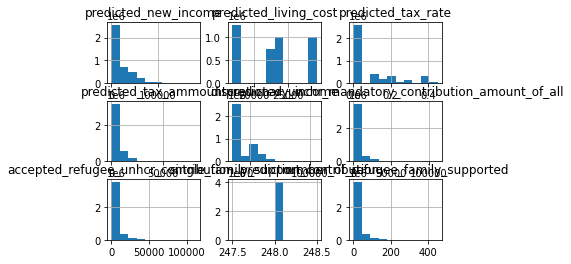

In [35]:
df.hist();

ModuleNotFoundError: No module named 'google.colab'